# Import modules

In [147]:
import pandas as pd
import numpy as np
import datetime as dt
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode, chi2_contingency
from colorama import Fore

# Initialize seaborn
sns.set(style="whitegrid")

# Load data

In [2]:
raw_data = pd.read_csv("dataset_SCL.csv", low_memory=False)
display(raw_data)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


# Inspect data

Inspect type of data on each column

In [3]:
# Get dtypes and NaN count
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


From above, we can se "Vlo-O" column is the only one with a Null (NaN) value. If it were a numeric column, an interpolation (linear or mean replaced value) might be applied on to not lose any data, but in this case the best is to avoid using that row.</br></br>
"Fecha-I" and "Fecha-O" are objects/strings. Thus, we convert those date to datetime format, backing up raw_data for any future use.

In [4]:
# Copy raw_data and let it as backup
new_data = raw_data.copy()
# Convert time data to datetime
time_cols = ["Fecha-I","Fecha-O"]
for col in time_cols:
    try:
        new_data[col] = pd.to_datetime(raw_data[col])
    except:
        pass
# Drop NaN rows
new_data.dropna(inplace=True)
# Get new dtypes
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68205 non-null  datetime64[ns]
 1   Vlo-I      68205 non-null  object        
 2   Ori-I      68205 non-null  object        
 3   Des-I      68205 non-null  object        
 4   Emp-I      68205 non-null  object        
 5   Fecha-O    68205 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68205 non-null  object        
 8   Des-O      68205 non-null  object        
 9   Emp-O      68205 non-null  object        
 10  DIA        68205 non-null  int64         
 11  MES        68205 non-null  int64         
 12  AÑO        68205 non-null  int64         
 13  DIANOM     68205 non-null  object        
 14  TIPOVUELO  68205 non-null  object        
 15  OPERA      68205 non-null  object        
 16  SIGLAORI   68205 non-null  object       

Then we can get some basic statistical analysis on columns by analizing the mode of each column and their unique values (due to being categorical data on mayority).

In [5]:
# Get second mode
scnd_mode = {}
scnd_mode_freq = {}
for col in new_data.columns:
    try:
        m = new_data[col].value_counts().index[1]
        f = new_data[col].value_counts().iloc[1]
    except IndexError:
        m = new_data[col].value_counts().index[0]
        f = new_data[col].value_counts().iloc[0]
    scnd_mode[col] = m
    scnd_mode_freq[col] = f
# Modes and their frequency, and, number of unique values of each column
pd.concat([
    pd.DataFrame(mode(new_data)[0][0], columns=['Mode'], index=new_data.columns),
    pd.DataFrame(mode(new_data)[1][0], columns=['Frequency'], index=new_data.columns),
    pd.DataFrame(scnd_mode, columns=scnd_mode.keys(), index=[0]).T.rename(columns={0: 'Second_Mode'}),
    pd.DataFrame(scnd_mode_freq, columns=scnd_mode_freq.keys(), index=[0]).T.rename(columns={0: 'Second_Mode_Frequency'}),
    new_data.nunique().rename('Unique'),
    new_data.count().rename('Count'),
], axis=1)

,Mode,Frequency,Second_Mode,Second_Mode_Frequency,Unique,Count
Fecha-I,2017-03-19 18:00:00,6,2017-03-19 18:00:00,6,53252,68205
Vlo-I,174,686,11,645,584,68205
Ori-I,SCEL,68205,SCEL,68205,1,68205
Des-I,SCFA,5787,SPJC,5269,64,68205
Emp-I,LAN,37611,SKU,14298,30,68205
Fecha-O,2017-05-19 07:01:00,5,2017-11-05 14:51:00,5,62774,68205
Vlo-O,174,649,11,646,861,68205
Ori-O,SCEL,68205,SCEL,68205,1,68205
Des-O,SCFA,5786,SPJC,5269,63,68205
Emp-O,LAN,20988,LXP,14558,32,68205


# Questions

### Data distribution

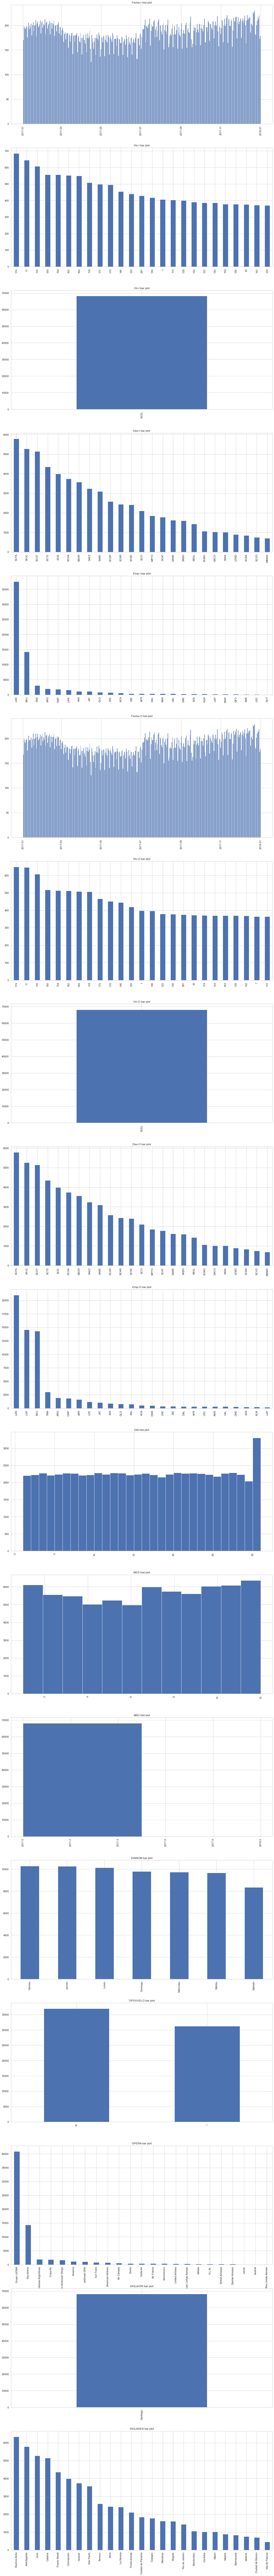

In [148]:
# Define list of plot type per column
plot_type_bycol = {
    'Fecha-I':('hist',365),
    'Vlo-I':('bar',0),
    'Ori-I':('bar',0),
    'Des-I':('bar',0),
    'Emp-I':('bar',0),
    'Fecha-O':('hist',365),
    'Vlo-O':('bar',0),
    'Ori-O':('bar',0),
    'Des-O':('bar',0),
    'Emp-O':('bar',0),
    'DIA':('hist',30),
    'MES':('hist',12),
    'AÑO':('hist',2),
    'DIANOM':('bar',0),
    'TIPOVUELO':('bar',0),
    'OPERA':('bar',0),
    'SIGLAORI':('bar',0),
    'SIGLADES':('bar',0),
}

# Create plots by type
fig, ax = plt.subplots(len(plot_type_bycol.items()),1, figsize=(20,200))
for ind, (col, p_type) in enumerate(plot_type_bycol.items()):
    try:
        ax[ind].set_title(f"{col} {p_type[0]} plot")
        if p_type[0].lower()=='bar':
            if new_data[col].nunique()>=25:
                new_data[col].value_counts().iloc[:25].plot.bar(ax=ax[ind], rot=90)
            else:
                new_data[col].value_counts().plot.bar(ax=ax[ind], rot=90)
        elif p_type[0].lower()=='hist':
            new_data[col].hist(ax=ax[ind], xrot=90, bins=p_type[1])  # For date, periodic drop (maybe Sunday(?))
        elif p_type[0].lower()=='box':
            new_data.boxplot(column=col, ax=ax[ind])
        else:
            print(f'Error - {col}')
    except:
        pass

From plots above we can extract certain insights:

<li>In the <b>Fecha-O</b> and <b>Fecha-I</b> plot, if we choose a binning near the width of 1 day, we can see certain patterns on peaks and lows. We can observe 4 lows in a time of 1 month (but without any further argument than seeing them with the naked eye) that might be <b>Sundays</b> or some day where people dont travel much.</li>
<li>We can see a seasonality on data from <b>january to july</b> and then from <b>july to january</b>, due to holydays probably.</li>
<li>We can't see any significant information by observing just the flight number, but we can see that most of the travels were done by flight number <b>174</b>.</li>
<li>We can see that the origin city for all flights was <b>Santiago</b>.</li>
<li>We cant see any significant information by observing just the destiny city, but we can see that the most visited city is <b>SCFA</b>.</li>
<li>We can't see any significant information by observing just the airline company code, but we can see that most of the flights come from <b>LAN</b>.</li>
<li>We can see a <b>uniform distribution</b> of flights per day of the month at least at the early and mid terms, <b>increasing</b> at the final days of the month (this with a binning near to number of days), maybe due to salary payment period.</li>
<li>We can see a low on flight by <b>june/july</b> and two peaks near <b>july/august and december/january</b>.</li>
<li>We can't see any significant information by observing just the <b>DIANOM</b> column, but we can see <b>Fryday</b> is the day when most people fly.</li>
<li>We can't see any significant information by observing just the type of flight, but we can see the most common type is <b>National</b> flights</li>
<li>We can't see any significant information by observing just the airline name, but we can see the most flights come from <b>LATAM group</b></li>
<li>We can't see any significant information by observing just <b>SIGLADES</b>, but we can see the most visited city is <b>Buenos Aires</b></li>

### Aditional data

 -Unique values of year are 2017, 2018
 
 -Explicar logica de temporada alta
 
 -Explicar que temporada alta corresponde a ~10% de vuelos totales
 
 -Ideas de modelos: LR, SVR y LR aplicado a PCA (ortogonalidad)

In [62]:
new_data["Fecha-I"].iloc[0]

datetime.date(2022, 1, 1)

In [75]:
## Create columns

# Difference of operation an schedules dates in minutes
dif_min = [x.total_seconds() / 60 for x in (new_data["Fecha-O"] - new_data["Fecha-I"])]

# High demand season
date_ranges = [("03/03", "15/07"), ("31/07", "11/09"), ("30/09", "15/12")]
temporada_alta = [
    0
    if any(
        [
            (
                dt.datetime.strptime(y[0], "%d/%m").date().replace(year=2022)
                < x.date().replace(year=2022)
                and x.date().replace(year=2022)
                < dt.datetime.strptime(y[1], "%d/%m").date().replace(year=2022)
            )
            for y in date_ranges
        ]
    )
    else 1
    for x in new_data["Fecha-I"]
]  # Inclusive

# Delay of 15 minutes
atraso_15 = [1 if x > 15 else 0 for x in dif_min]
tp = {"mañana": (5, 12), "tarde": (12, 19), "noche": (19, 5)}
tp_d = {
    p: (
        dt.timedelta(hours=t[0]).total_seconds() / 3600,
        dt.timedelta(hours=t[1]).total_seconds() / 3600,
    )
    for p, t in tp.items()
}
new_data_Fecha_I_minutes = [x.hour for x in new_data["Fecha-I"]]

# Period of day
periodo_dia = [
    "mañana"
    if (x >= tp_d["mañana"][0] and x < tp_d["mañana"][1])
    else "tarde"
    if (x >= tp_d["tarde"][0] and x < tp_d["tarde"][1])
    else "noche"
    for x in new_data_Fecha_I_minutes
]



In [76]:
## Add columns
new_data = new_data.assign(dif_min=dif_min,temporada_alta=temporada_alta,atraso_15=atraso_15,periodo_dia=periodo_dia)

In [77]:
## Export to file
new_data[
    [
        "dif_min",
        "temporada_alta",
        "atraso_15",
        "periodo_dia"
    ]
].to_csv("synthetic_features.csv")

### Correlations

##### Correlation between delay and each other variables

index 1 / sum(col)

cramer v


podria usar arboles

quitar unique values with low frequencies (at least 5 to use chi2 properly)

In [164]:
# Create new column from dif_min (1 if delayed and -1 if advanced)
new_data = new_data.assign(dif_min_binary=new_data['dif_min'].apply(lambda x: 1 if x>0 else -1))
# Get combinations of columns
cols_of_interest = [
    "dif_min_binary", "temporada_alta", "periodo_dia", "MES", "DIANOM", "TIPOVUELO", "OPERA", "SIGLADES"
]
# Get number of combinations with dif_min_binary
col_pairs = [col_pair for col_pair in itertools.combinations(cols_of_interest, 2) if "dif_min_binary" in col_pair]
# Create contingency table for each combination
pvals = {}
for ind, col_pair in enumerate(col_pairs):
    try:
        # Get cross table
        cross_tab = pd.crosstab(new_data[col_pair[0]], new_data[col_pair[1]])
        display(cross_tab)
        print(f"{Fore.MAGENTA}{col_pair}{Fore.WHITE}")
        # Drop low frequencies
        cols = [col for col in cross_tab.columns if any([cross_tab[col][ind] <= 5 for ind in cross_tab.index])]
        print(f"{Fore.CYAN}Dropped columns (due to low frequencies){Fore.WHITE} : {cols}")
        cross_tab = cross_tab.drop(columns=cols)
        # Hypothesis testing (with dropped columns)
        print(f"{Fore.CYAN}P-value (with dropped columns){Fore.WHITE} = {chi2_contingency(cross_tab)[1]}")
        cond_reject = chi2_contingency(cross_tab)[1]<=0.05
        print(f"{Fore.CYAN}H0 rejected (correlated columns){Fore.WHITE} = {Fore.GREEN if cond_reject else Fore.RED}{cond_reject}")
        pvals[[x for x in col_pair if "dif_min_binary" != x][0]] = chi2_contingency(cross_tab)[1]
    except ValueError:
        pass

temporada_alta,0,1
dif_min_binary,,
-1,15495,7204
1,29949,15557


('dif_min_binary', 'temporada_alta')
Dropped columns (due to low frequencies) : []
P-value (with dropped columns) = 1.7199281526177172e-10
H0 rejected (correlated columns) = True


periodo_dia,mañana,noche,tarde
dif_min_binary,,,
-1,8617,6238,7844
1,16734,11110,17662


('dif_min_binary', 'periodo_dia')
Dropped columns (due to low frequencies) : []
P-value (with dropped columns) = 4.561052155098444e-30
H0 rejected (correlated columns) = True


MES,1,2,3,4,5,6,7,8,9,10,11,12
dif_min_binary,,,,,,,,,,,,
-1,2066,1933,2381,2046,1880,1751,1378,2027,1989,1732,1870,1646
1,4041,3628,3101,2974,3360,3230,4614,3717,3621,4300,4210,4710


('dif_min_binary', 'MES')
Dropped columns (due to low frequencies) : []
P-value (with dropped columns) = 1.9463006383679675e-196
H0 rejected (correlated columns) = True


DIANOM,Domingo,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes
dif_min_binary,,,,,,,
-1,3534,3244,3291,3456,3306,2957,2911
1,6262,7006,6840,6206,6416,5395,7381


('dif_min_binary', 'DIANOM')
Dropped columns (due to low frequencies) : []
P-value (with dropped columns) = 6.468880636862522e-43
H0 rejected (correlated columns) = True


TIPOVUELO,I,N
dif_min_binary,,
-1,10043,12656
1,21196,24310


('dif_min_binary', 'TIPOVUELO')
Dropped columns (due to low frequencies) : []
P-value (with dropped columns) = 8.542484154690932e-09
H0 rejected (correlated columns) = True


OPERA,Aerolineas Argentinas,Aeromexico,Air Canada,Air France,Alitalia,American Airlines,Austral,Avianca,British Airways,Copa Air,...,Iberia,JetSmart SPA,K.L.M.,Lacsa,Latin American Wings,Oceanair Linhas Aereas,Plus Ultra Lineas Aereas,Qantas Airways,Sky Airline,United Airlines
dif_min_binary,,,,,,,,,,,,,,,,,,,,,
-1,797,273,127,207,109,542,26,492,81,1165,...,149,448,164,52,420,145,7,17,5868,267
1,1152,78,438,151,150,215,48,660,124,685,...,213,647,87,40,1253,134,42,178,8430,68


('dif_min_binary', 'OPERA')
Dropped columns (due to low frequencies) : []
P-value (with dropped columns) = 0.0
H0 rejected (correlated columns) = True


SIGLADES,Antofagasta,Arica,Asuncion,Atlanta,Auckland N.Z.,Balmaceda,Bariloche,Bogota,Buenos Aires,Calama,...,"San Juan, Arg.",Santa Cruz,Sao Paulo,Sydney,Temuco,Toronto,Tucuman,Ushuia,Valdivia,Washington
dif_min_binary,,,,,,,,,,,,,,,,,,,,,
-1,2269,877,43,248,54,211,0,558,1780,2157,...,9,12,1039,17,795,94,13,0,295,1
1,3517,1559,189,110,307,628,2,1046,4555,2989,...,26,108,2530,177,1794,189,25,6,458,0


('dif_min_binary', 'SIGLADES')
Dropped columns (due to low frequencies) : ['Bariloche', 'Cataratas Iguacu', 'Cochabamba', 'Curitiba, Bra.', 'Melbourne', 'Pisco, Peru', 'Puerto Stanley', 'Punta del Este', 'Quito', 'Ushuia', 'Washington']
P-value (with dropped columns) = 0.0
H0 rejected (correlated columns) = True


##### Ratio plots (with dropped columns)

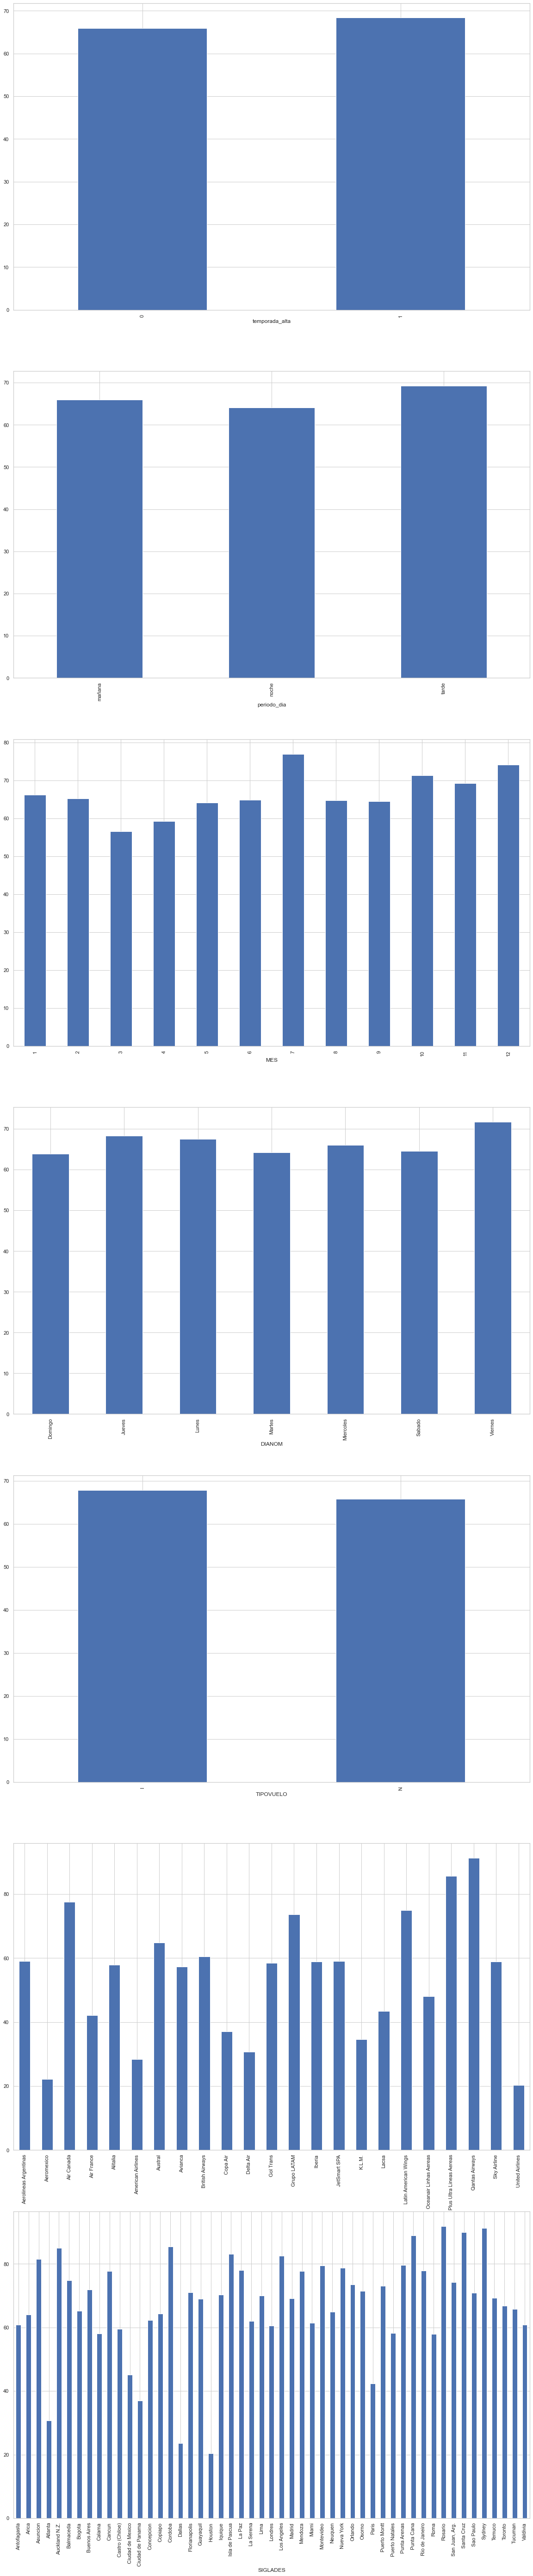

In [165]:
# Get number of combinations with dif_min_binary
col_pairs = [col_pair for col_pair in itertools.combinations(cols_of_interest, 2) if "dif_min_binary" in col_pair]
# Create contingency table for each combination
fig, ax = plt.subplots(len(col_pairs),1, figsize=(20,100))
for ind, col_pair in enumerate(col_pairs):
    try:
        # Get cross table
        cross_tab = pd.crosstab(new_data[col_pair[0]], new_data[col_pair[1]])
        # Drop low frequencies
        cols = [col for col in cross_tab.columns if any([cross_tab[col][ind] <= 5 for ind in cross_tab.index])]
        cross_tab = cross_tab.drop(columns=cols)
        # Plot ratio of each combination
        (cross_tab.iloc[1]/cross_tab.sum(axis=0)*100).plot.bar(ax=ax[ind], rot=90)
    except ValueError:
        pass

##### Correlation between delay and other variables, all at once

In [166]:
# Create contingency table for each combination
dif_cols_of_interest = [
    "temporada_alta", "periodo_dia", "MES", "DIANOM", "TIPOVUELO", "OPERA", "SIGLADES"
]
cont_tab = pd.crosstab(new_data["dif_min_binary"], [new_data[col] for col in dif_cols_of_interest])
display(cont_tab)

temporada_alta                     0                                     \
periodo_dia                   mañana                                      
MES                               3                                       
DIANOM                       Domingo                                      
TIPOVUELO                          I                                      
OPERA          Aerolineas Argentinas   Air Canada Alitalia Avianca        
SIGLADES                Buenos Aires Buenos Aires     Roma  Bogota Lima   
dif_min_binary                                                            
-1                                 2            0        0       3    3   
 1                                 5            1        1       1    0   

temporada_alta                                                              \
periodo_dia                                                                  
MES                                                                          
DIANOM                                                                       
TIPOVUELO                                                                    
OPERA                  Copa Air Gol Trans Grupo LATAM                        
SIGLADES       Ciudad de Panama Sao Paulo      Bogota Buenos Aires Cordoba   
dif_min_binary                                                               
-1                            3         3           2            2       2   
 1                            0         1           2           14       2   

temporada_alta  ...           1                                             \
periodo_dia     ...       tarde                                              
MES             ...          12                                              
DIANOM          ...     Viernes                                              
TIPOVUELO       ...           N                                              
OPERA           ... Sky Airline                                              
SIGLADES        ...       Arica Balmaceda Calama Copiapo Iquique La Serena   
dif_min_binary  ...                                                          
-1              ...           0         1      1       0       0         1   
 1              ...           3         2      8       3       3         2   

temporada_alta                                            
periodo_dia                                               
MES                                                       
DIANOM                                                    
TIPOVUELO                                                 
OPERA                                                     
SIGLADES       Puerto Montt Punta Arenas Temuco Valdivia  
dif_min_binary                                            
-1                        0            0      0        0  
 1                        3            3      3        3  

[2 rows x 13815 columns]

In [167]:
# Get maxmimum frequency value and associated column
ind_max = cont_tab.iloc[1].argmax()
ind_max_col = cont_tab.columns[ind_max]
print(f"{Fore.CYAN}Highest frequency combination{Fore.WHITE} = {ind_max_col}")
# Show p-values
print(f"{Fore.CYAN}P-values{Fore.WHITE} : {pvals}")

Highest frequency combination = (1, 'noche', 1, 'Lunes', 'I', 'Grupo LATAM', 'Lima')
P-values : {'temporada_alta': 1.7199281526177172e-10, 'periodo_dia': 4.561052155098444e-30, 'MES': 1.9463006383679675e-196, 'DIANOM': 6.468880636862522e-43, 'TIPOVUELO': 8.542484154690932e-09, 'OPERA': 0.0, 'SIGLADES': 0.0}


In [174]:
# Get number of combinations with dif_min_binary
col_pairs = [col_pair for col_pair in itertools.combinations(new_data.columns, 2) if "dif_min_binary" in col_pair]
# Create contingency table for each combination
pvals = {}
for ind, col_pair in enumerate(col_pairs):
    try:
        # Get cross table
        cross_tab = pd.crosstab(new_data[col_pair[0]], new_data[col_pair[1]])
        # Drop low frequencies
        cols = [col for col in cross_tab.columns if any([cross_tab[col][ind] <= 5 for ind in cross_tab.index])]
        cross_tab = cross_tab.drop(columns=cols)
        # Hypothesis testing (with dropped columns)
        cond_reject = chi2_contingency(cross_tab)[1]<=0.05
        if cond_reject:
            print(f"{Fore.MAGENTA}{col_pair}{Fore.WHITE}")
            print(f"{Fore.CYAN}P-value (with dropped columns){Fore.WHITE} = {chi2_contingency(cross_tab)[1]}")
            print(f"{Fore.CYAN}H0 rejected (correlated columns){Fore.WHITE} = {Fore.GREEN if cond_reject else Fore.RED}{cond_reject}{Fore.WHITE}")
    except ValueError:
        pass

('Fecha-I', 'dif_min_binary')
('Vlo-I', 'dif_min_binary')
('Des-I', 'dif_min_binary')
('Emp-I', 'dif_min_binary')
('Fecha-O', 'dif_min_binary')
('Vlo-O', 'dif_min_binary')
('Des-O', 'dif_min_binary')
('Emp-O', 'dif_min_binary')
('DIA', 'dif_min_binary')
P-value (with dropped columns) = 1.4073097117408072e-10
H0 rejected (correlated columns) = True
('MES', 'dif_min_binary')
P-value (with dropped columns) = 1.946300638367746e-196
H0 rejected (correlated columns) = True
('AÑO', 'dif_min_binary')
('DIANOM', 'dif_min_binary')
P-value (with dropped columns) = 6.468880636862522e-43
H0 rejected (correlated columns) = True
('TIPOVUELO', 'dif_min_binary')
P-value (with dropped columns) = 8.542484154690932e-09
H0 rejected (correlated columns) = True
('OPERA', 'dif_min_binary')
P-value (with dropped columns) = 0.0
H0 rejected (correlated columns) = True
('SIGLADES', 'dif_min_binary')
('dif_min', 'dif_min_binary')
('temporada_alta', 'dif_min_binary')
P-value (with dropped columns) = 1.7199281526177

After analyzing the different p-values and ratio of delay on flights, we can see:
<li>There are odd p-values (too small and the highest) for airline operator and destination city, with relation with flight delay, which might be a sign of extremely correlated features (target-feature) or an statistical error/outlier. Anyway, a flight delay may be related with the destination city due to infraestructure, concurrency, etc; and can be related with the operator airline due to bad management, high demand and low offer, etc.</li>
<li>The features with the highest (non-zero) p-value, rejecting H0, are month and day of the week, which were noticed on the distribution analysis, where appeared periodic lows inside each month (maybe weeks) and, due to high and low demand seasons, certain months were more inclined to have delays.</li>
<li>In spite of month being the lowest (non-zero) p-value, the common sense tell us high demand season should be comparable, but the order of difference is too big.</li>
<li>In conclusion, the features that should have the most impact on flight delay would be: <b><i>destination, operator airline, month, day of the week, period of the day, high demand and flight type</i></b> on decreasing order.</li>

Buscar dia o periodicidad de valles en fechas dentro de un mismo mes

### Modeling data